In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import pymaster as nmt
hp.disable_warnings()

In [7]:
a = np.array([1,2,3,4,5,6,7])
a[0::2]

array([1, 3, 5, 7])

In [242]:
import pickle
with open('std_22301151.pkl', 'rb') as f:
    std = pickle.load(f)

In [243]:
std.keys()

dict_keys(['22301151.41', '22301151.45', '22301151.49'])

Text(0.5, 0, 'standard deviation (K_CMB)')

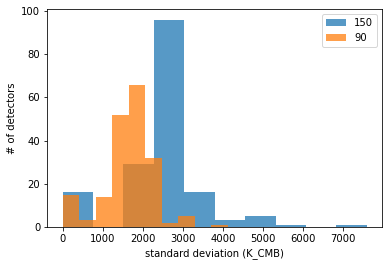

In [248]:
high = []
low = []
obs = '22301151.41'

for det in std[obs]['150']:
    high.append(std[obs]['150'][det])
for det in std[obs]['90']:
    low.append(std[obs]['90'][det])

plt.hist(high, label='150', alpha=0.75)
plt.hist(low, label='90', alpha=0.75)
plt.legend()
plt.ylabel('# of detectors')
plt.xlabel('standard deviation (K_CMB)')

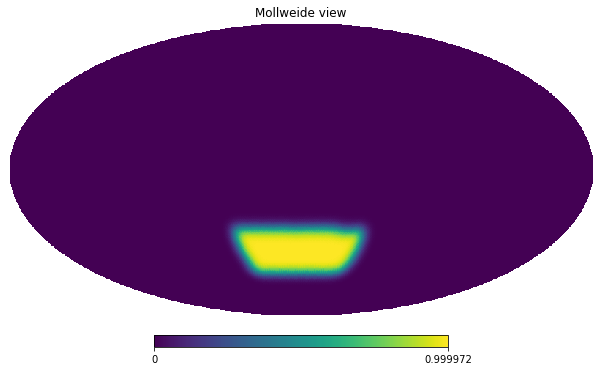

In [179]:
hits = hp.read_map('low_noise_coadd/total_hits.fits', dtype=np.float64, verbose=False)
hits[hits>0] = 1
mask_apo = nmt.mask_apodization(hits, 3, apotype='Smooth')
hp.mollview(mask_apo)
nside = hp.get_nside(hits)

b = nmt.NmtBin.from_nside_linear(nside, 16, is_Dell=True)
ell = b.get_effective_ells()

f_0 = nmt.NmtField(mask=mask_apo, maps=[hp.read_map('low_noise_coadd/coadded_map.fits', field=0, dtype=np.float64, verbose=False)])
f_2 = nmt.NmtField(mask=mask_apo, maps=hp.read_map('low_noise_coadd/coadded_map.fits', field=[1,2], dtype=np.float64, verbose=False))
dl_00 = nmt.compute_full_master(f_0, f_0, b)
dl_22 = nmt.compute_full_master(f_2, f_2, b)

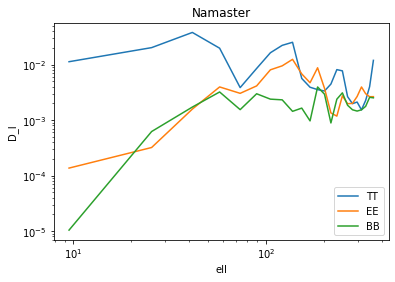

In [189]:
plt.plot(ell, dl_00[0], label='TT')
plt.plot(ell, dl_22[0], label='EE')
plt.plot(ell, dl_22[3], label='BB')
plt.legend()
plt.ylabel('D_l')
plt.xlabel('ell')
plt.title('Namaster')
plt.yscale('log')
plt.xscale('log')

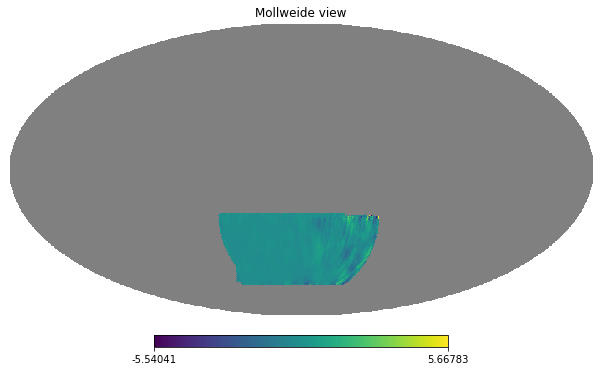

In [181]:
m = hp.read_map('low_noise_coadd/coadded_map.fits', field=None, dtype=np.float64, verbose=False)
hits = hp.read_map('low_noise_coadd/total_hits.fits', dtype=np.float64, verbose=False)
observed = np.where(hits==0)[0]
m[0][observed] = hp.UNSEEN
hp.mollview(m[0])

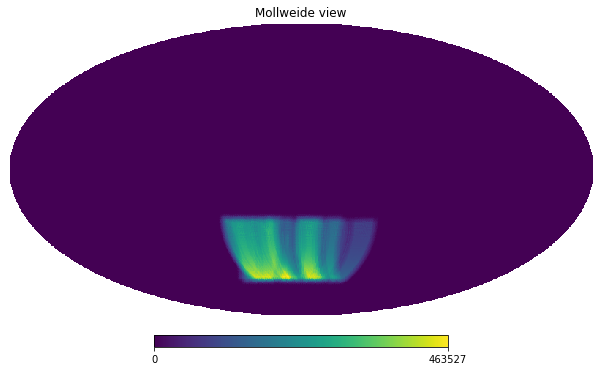

In [182]:
hp.mollview(hits)

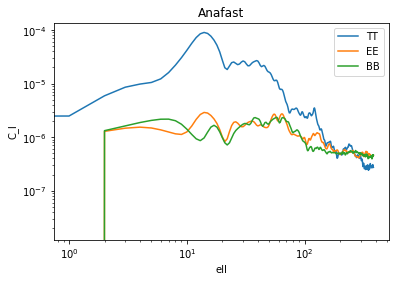

In [192]:
cl = hp.anafast(m)
plt.plot(cl[0], label='TT')
plt.plot(cl[1], label='EE')
plt.plot(cl[2], label='BB')
plt.legend()
plt.xlabel('ell')
plt.ylabel('C_l')
plt.title('Anafast')
plt.yscale('log')
plt.xscale('log')

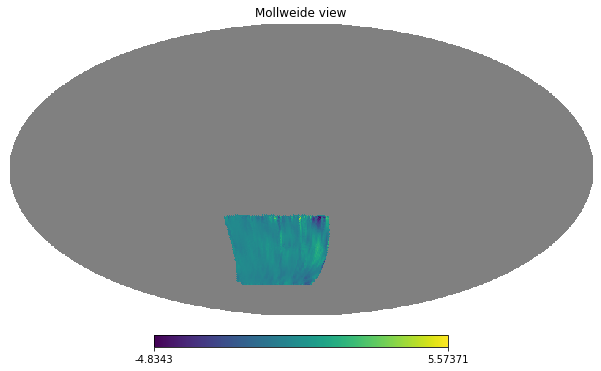

In [147]:
m = hp.read_map('2bcoadded/881/data_telescope_all_time_all_binned.fits', field=None, dtype=np.float64, verbose=False)
hits = hp.read_map('2bcoadded/881/data_telescope_all_time_all_hits.fits', dtype=np.float64, verbose=False)
observed = np.where(hits==0)[0]
m[0][observed] = hp.UNSEEN
hp.mollview(m[0])

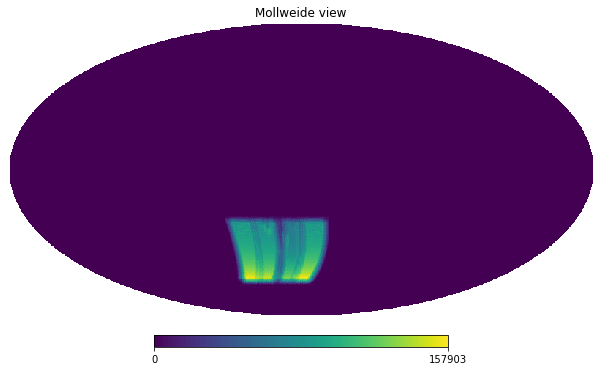

In [148]:
hp.mollview(hits)

In [26]:
m = hp.read_map('map_0.fits', field=None, dtype=np.float64, verbose=False)

In [27]:
hp.write_map('input_maps/map_I.fits', (hp.reorder(m[0], r2n=True)), nest=True, overwrite=True)
hp.write_map('input_maps/map_Q.fits', (hp.reorder(m[1], r2n=True)), nest=True, overwrite=True)
hp.write_map('input_maps/map_U.fits', (hp.reorder(m[2], r2n=True)), nest=True, overwrite=True)


128


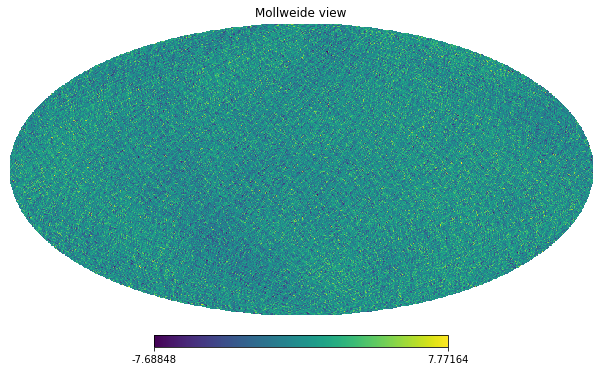

In [39]:
m_in = hp.read_map('input_maps/map_U.fits', field=None, dtype=np.float64, verbose=False)
hp.mollview(m_in)
print(hp.get_nside(m_in))

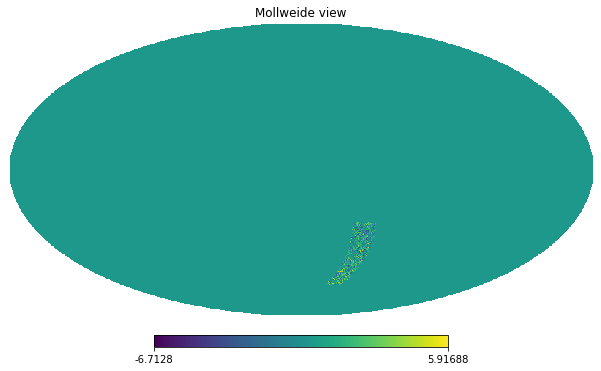

In [40]:
m = hp.read_map('maps_demod/U/data_telescope_all_time_all_binned.fits', field=None, dtype=np.float64, verbose=False)
hp.mollview(m)

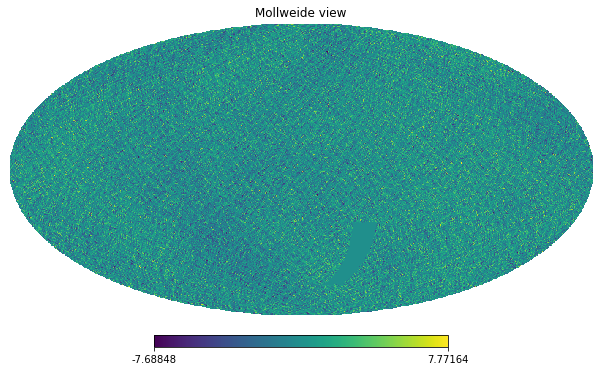

In [41]:
hp.mollview(m_in-m)

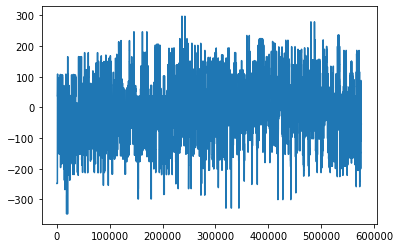

In [47]:
plt.plot(np.load('tod_I.npy'))